# PARIS 2024-OLYMPIC GAMES: RESULTS ANALYSIS



### A BRIEF DESCRIPTION


This project analyzes the results of the Paris 2024 Olympics with the goal of uncovering trends and understanding performance patterns across countries, sports, and events. Using CSV tabulated data, we begin with data cleaning and exploratory data analysis (EDA) to gain insights into medal distribution, athlete performance, and national standings.

In the latter part of the project, machine learning techniques are applied to build predictive models that estimate medal outcomes based on features such as country, past performance, and event type. By combining data analytics with predictive modeling, this notebook offers a comprehensive view of global athletic and country performance at the 2024 Games.



### DATA CLEANING & EDA

In [316]:
#Importing the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [318]:
#Loading the dataset:
dataset = pd.read_csv("Paris2024OlympicGames_Results.csv")


In [421]:
dataset.head()


,Local_Time,Gender,Event,Round,startlist_url,results_url,summary_url,points_url,Position,Bib_Number,Athlete_Name,Country,Mark
0,08:00,M,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,1.0,29.0,Brian Daniel PINTADO,ECU,4735.0
1,08:00,M,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,2.0,15.0,Caio BONFIM,BRA,4749.0
2,08:00,M,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,3.0,33.0,Álvaro MARTÍN,ESP,4751.0
3,08:00,M,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,4.0,55.0,Massimo STANO,ITA,4752.0
4,08:00,M,20 Kilometres Race Walk,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,5.0,18.0,Evan DUNFEE,CAN,4756.0


In [423]:
dataset.tail()

,Local_Time,Gender,Event,Round,startlist_url,results_url,summary_url,points_url,Position,Bib_Number,Athlete_Name,Country,Mark
3545,08:00,W,Marathon,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,0.0,1917.0,Melat Yisak KEJETA,GER,NaN
3546,08:00,W,Marathon,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,0.0,2374.0,Jackline SAKILU,TAN,NaN
3547,08:00,W,Marathon,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,0.0,2297.0,Joan Chelimo MELLY,ROU,NaN
3548,08:00,W,Marathon,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,0.0,1522.0,Sinead DIVER,AUS,NaN
3549,08:00,W,Marathon,Final,https://worldathletics.org/results/olympic-gam...,https://worldathletics.org/results/olympic-gam...,NaN,NaN,0.0,2461.0,Fiona O'KEEFFE,USA,NaN


In [324]:
#Checking the shape of the dataset:
dataset.shape

(3550, 13)

In [326]:
#Checking the columns of the dataset:
dataset.columns

Index(['local_time', 'sex', 'event', 'round', 'startlist_url', 'results_url',
       'summary_url', 'points_url', 'pos', 'bib', 'name', 'country', 'mark'],
      dtype='object')

In [328]:
#Changing column names:
dataset.rename(columns={
    'local_time': 'Local_Time',
    'sex': 'Gender',
    'event': 'Event',
    'round': 'Round',
    'pos': 'Position',
    'bib': 'Bib_Number',
    'name': 'Athlete_Name',
    'country': 'Country',
    'mark': 'Mark'
}, inplace=True)


In [330]:
#Checking datatypes:
dataset.dtypes


Local_Time        object
Gender            object
Event             object
Round             object
startlist_url     object
results_url       object
summary_url       object
points_url        object
Position         float64
Bib_Number       float64
Athlete_Name      object
Country           object
Mark              object
dtype: object

In [332]:
#Converting data types
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Event'] = dataset['Event'].astype('category')
dataset['Round'] = dataset['Round'].astype('category')

#Convert 'Time_mark' and 'Local Time' (in hh:mm:ss) to timedelta
dataset['Mark'] = pd.to_timedelta(dataset['Mark'], errors='coerce')

# Converting timedeltas to total seconds (numeric)
dataset['Mark'] = dataset['Mark'].dt.total_seconds()


#Irrelevant url columns were dropped using the code below. The text is in raw format because the code should not be rerun to avoid errors.
dataset.drop(['startlist_url', 'results_url', 'summary_url', 'points_url'], axis=1, inplace=True)


In [334]:
#Checking for missing values:
dataset.isna().sum()

Local_Time          0
Gender              0
Event               0
Round               0
startlist_url       0
results_url         0
summary_url       773
points_url       3115
Position          149
Bib_Number        146
Athlete_Name        0
Country             0
Mark             3287
dtype: int64

In [336]:
dataset.fillna({
    'Local_Time' : 0.0,
    'Position' : 0.0,
        }, inplace=True)

In [338]:
dataset.dtypes

Local_Time         object
Gender           category
Event            category
Round            category
startlist_url      object
results_url        object
summary_url        object
points_url         object
Position          float64
Bib_Number        float64
Athlete_Name       object
Country            object
Mark              float64
dtype: object

In [340]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Local_Time     3550 non-null   object  
 1   Gender         3550 non-null   category
 2   Event          3550 non-null   category
 3   Round          3550 non-null   category
 4   startlist_url  3550 non-null   object  
 5   results_url    3550 non-null   object  
 6   summary_url    2777 non-null   object  
 7   points_url     435 non-null    object  
 8   Position       3550 non-null   float64 
 9   Bib_Number     3404 non-null   float64 
 10  Athlete_Name   3550 non-null   object  
 11  Country        3550 non-null   object  
 12  Mark           263 non-null    float64 
dtypes: category(3), float64(3), object(7)
memory usage: 289.4+ KB


In [344]:
# Checking for any duplicate rows in the dataset
dataset.duplicated().any()

False

In [345]:
# Saving to a csv
dataset.to_csv("Olympics_results_data_cleaned.csv", index=False)

### DATA VISUALISATION

Text(0, 0.5, 'Frequency')

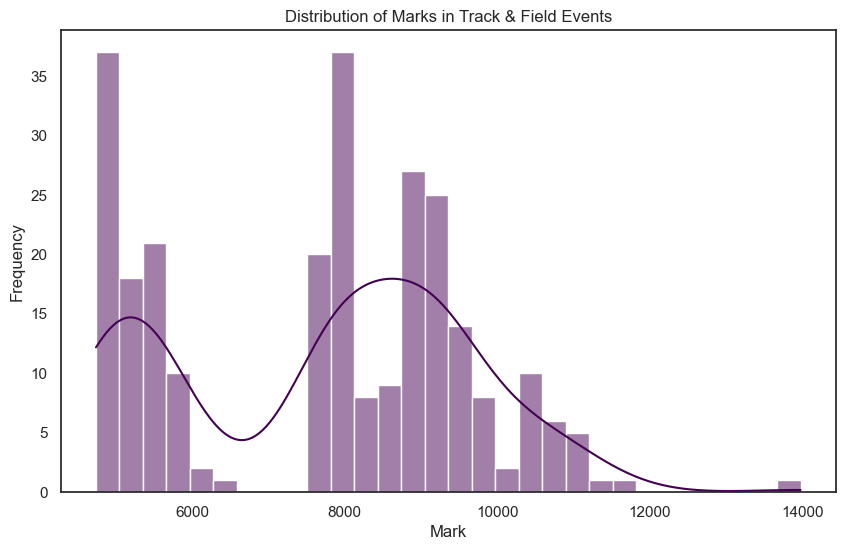

In [546]:
#1. Performance Analysis - Distribution of (Marks)

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Mark'], bins=30, kde=True, color='#440154')  
plt.title('Distribution of Marks in Track & Field Events')
plt.xlabel('Mark')
plt.ylabel('Frequency')

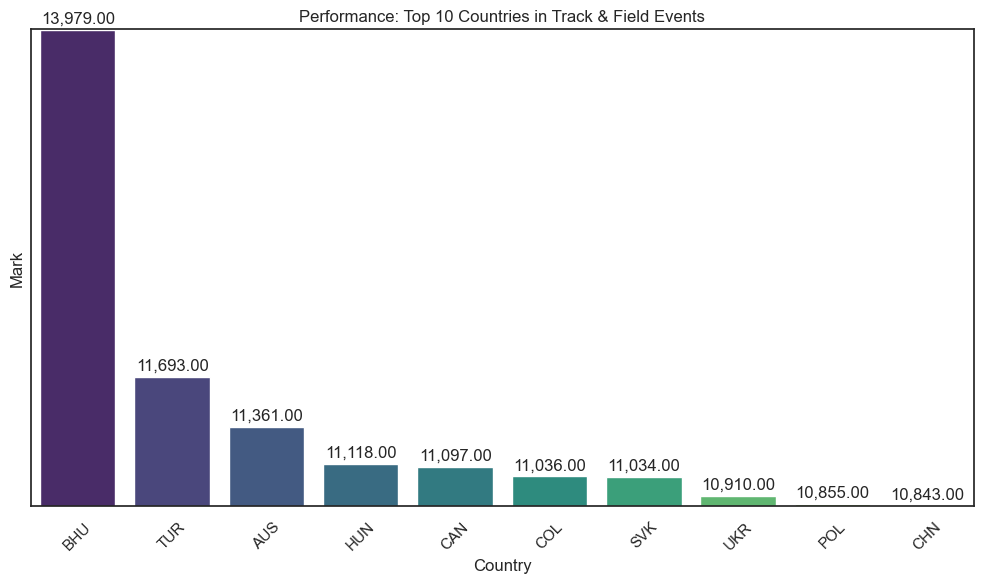

In [550]:
# 2. Top 10 Performers in Track and Field (Country By Country)
top_performers = dataset.nlargest(10, 'Mark')

# Setting the plot:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country', y='Mark', data=top_performers, palette='viridis')

# Adding data labels with rounded figures and commas:
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}', label_type='edge', padding=3)

# Customising plot:
plt.title('Performance: Top 10 Countries in Track & Field Events')
plt.xlabel('Country')
plt.ylabel('Mark')
plt.xticks(rotation=45)
plt.yticks([])

# Adjusting y-axis limits for better detail
min_mark = top_performers['Mark'].min()
max_mark = top_performers['Mark'].max()
plt.ylim(min_mark - 1, max_mark + 1)

plt.grid(False)
plt.tight_layout()
plt.show()


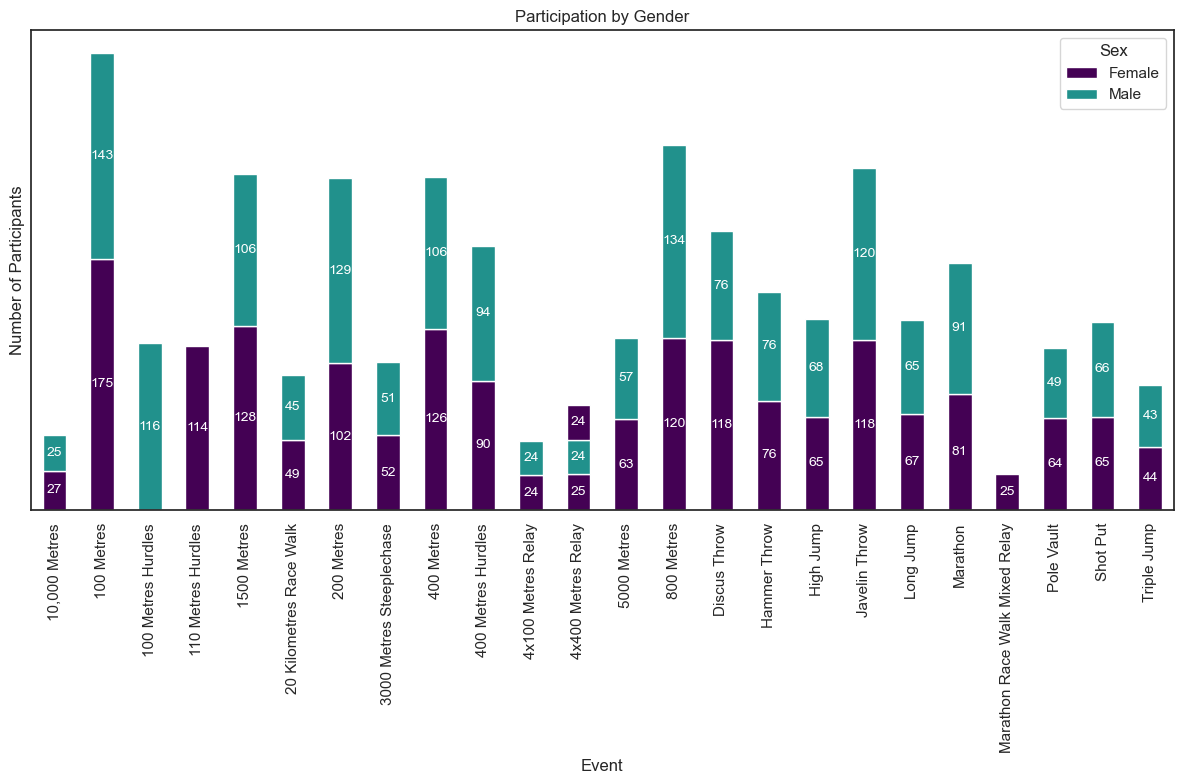

In [552]:
# 3.Analyzing No. of Participants in Field and Track Events by Gender (Stacked Bar Chart)
event_sex_count = dataset.groupby(['Event', 'Gender']).size().unstack().fillna(0)

# Plotting the stacked bar chart
ax = event_sex_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#440154', '#21918c'])
plt.title('Participation by Gender')
plt.xlabel('Event')
plt.ylabel('Number of Participants')
plt.xticks(rotation=90)
plt.yticks([])
plt.legend(title='Sex', labels=['Female', 'Male'])
for container in ax.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontsize=10)
plt.tight_layout()
plt.show()


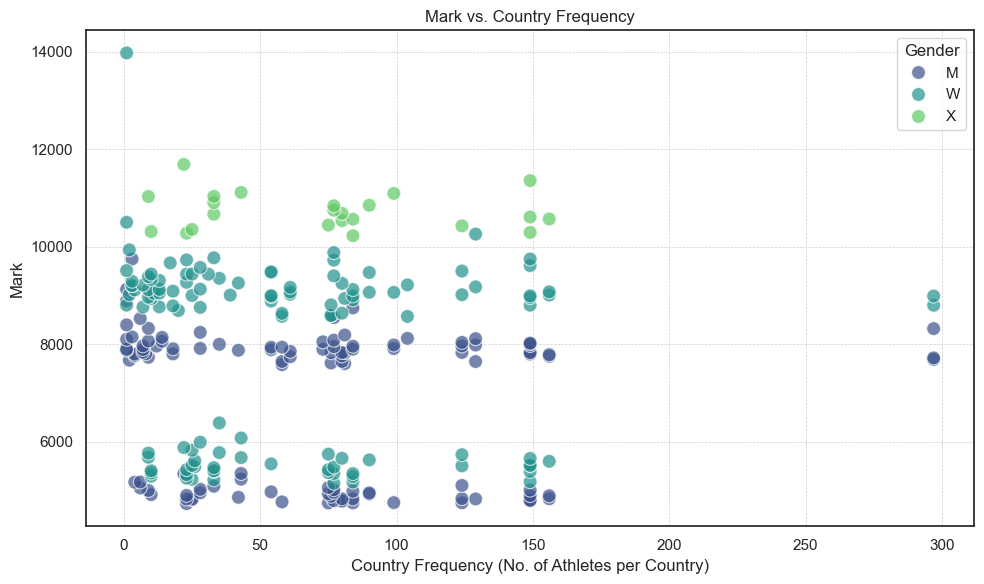

In [560]:
# 4. Calculating country frequency (number of athletes per country)
country_freq = dataset['Country'].value_counts().to_dict()
dataset['country_freq'] = dataset['Country'].map(country_freq)
dataset['Mark'] = pd.to_numeric(dataset['Mark'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country_freq', y='Mark', data=dataset, hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Mark vs. Country Frequency')
plt.xlabel('Country Frequency (No. of Athletes per Country)')
plt.ylabel('Mark')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



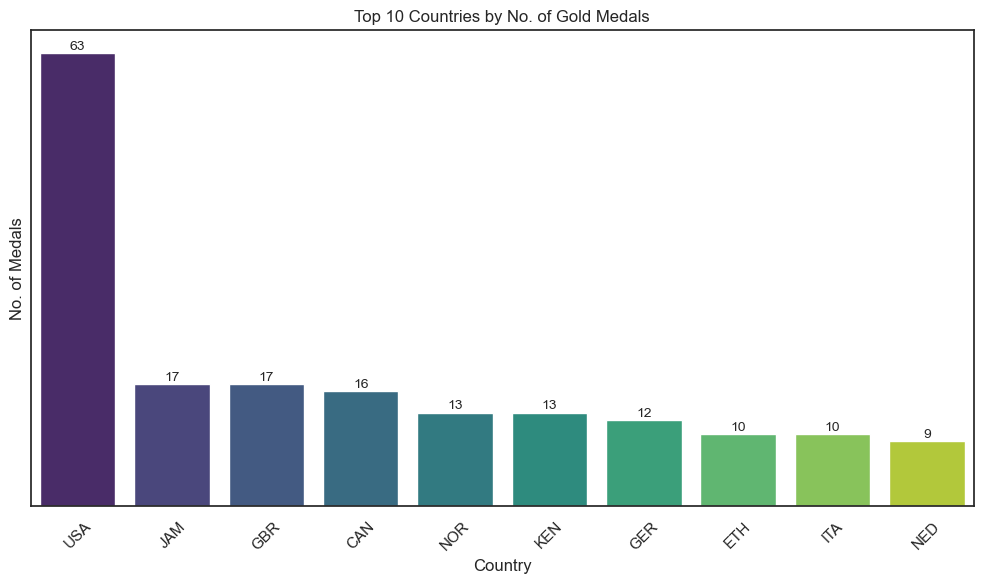

In [564]:
#5. Medal Distribution by Country
country_medals = dataset.groupby('Country')['Position'].value_counts().unstack().fillna(0)
country_medals = country_medals[1]  # Focus on first position (Gold Medalists)
country_medals = country_medals.sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=country_medals.index, y=country_medals.values, palette='viridis')

# Add data labels on top of the bars
for i, v in enumerate(country_medals.values):
    plt.text(i, v + 0.05, f'{int(v)}', ha='center', va='bottom', fontsize=10)

# Set titles and labels
plt.title('Top 10 Countries by No. of Gold Medals')
plt.xlabel('Country')
plt.ylabel('No. of Medals')
plt.yticks([])
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


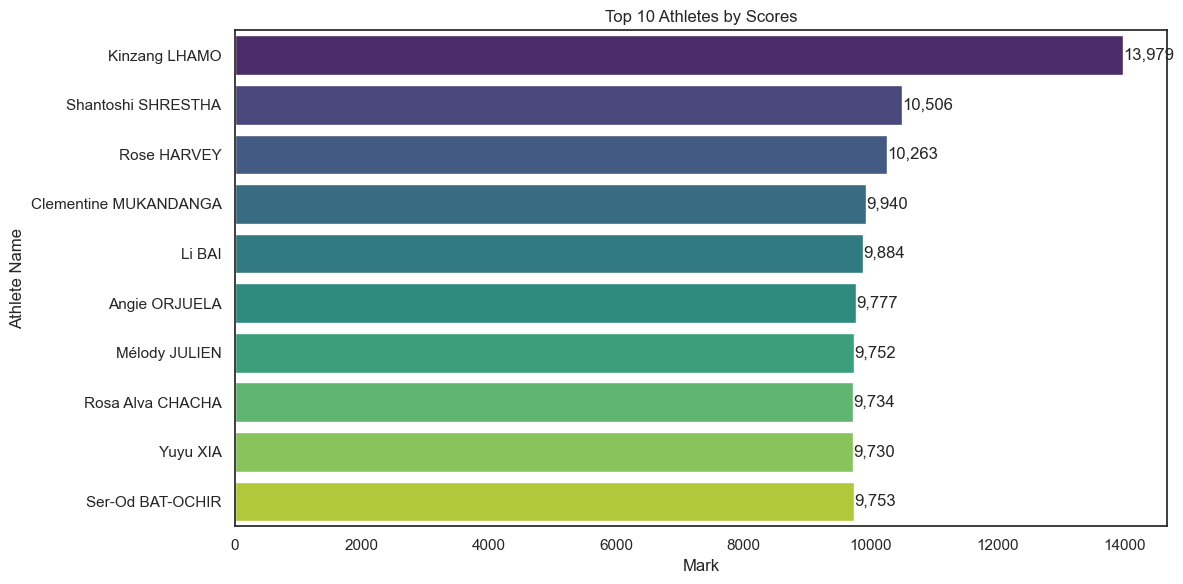

In [586]:

# Top 5 Athletes by Scores
top_athletes = dataset.sort_values(by='Position', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Mark', y='Athlete_Name', data=top_athletes, palette='viridis')

# Titles and Labels
plt.title('Top 10 Athletes by Scores')
plt.xlabel('Mark')
plt.ylabel('Athlete Name')

# Adding data labels (rounded and comma-formatted)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5,                        # Position: slightly outside the bar
            p.get_y() + p.get_height() / 2,     # Centered vertically on the bar
            f'{int(round(width)):,}',           # Format: rounded + commas
            va='center')

# Remove gridlines
ax.grid(False)

plt.tight_layout()
plt.show()


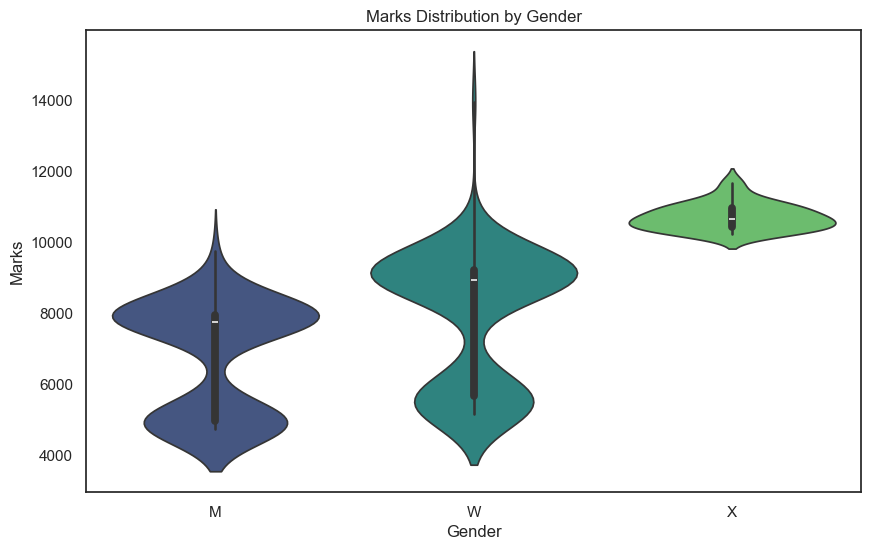

In [566]:
#6. Performance Distribution by Gender (Violin Plot)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Mark', data=dataset, palette='viridis')
plt.title('Marks Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Marks')
plt.grid(False)
plt.show()


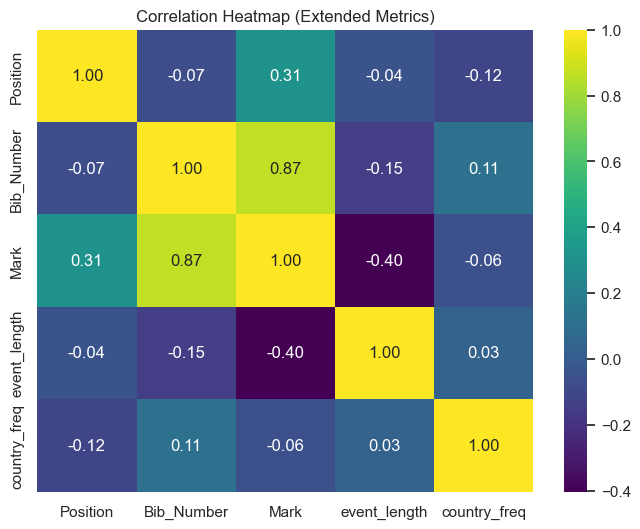

In [427]:
#7. Correlation Heat Map with Extended Metrics

# Creating the event length column
dataset['event_length'] = dataset['Event'].apply(lambda x: len(str(x)))

# Frequency encoding for country
country_freq = dataset['Country'].value_counts().to_dict()
dataset['country_freq'] = dataset['Country'].map(country_freq)

numeric_cols = ['Position', 'Bib_Number', 'Mark', 'event_length', 'country_freq']
corr_matrix = dataset[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap (Extended Metrics)')
plt.show()


## Machine Learning

In [568]:
#Creating the Predictive Model

dataset['Position'] = pd.to_numeric(dataset['Position'], errors='coerce')

dataset['podium'] = dataset['Position'] <= 3

print('Podium finish counts:')
print(dataset['podium'].value_counts())

# Selecting features for the model
feature_columns = ['Bib_Number', 'Gender', 'Event', 'Round', 'Country']
model_dataset = dataset[feature_columns + ['podium']].dropna()

# One-hot encoding for categorical variables
model_dataset_encoded = pd.get_dummies(model_dataset, columns=['Gender', 'Event', 'Round', 'Country'], drop_first=True)

# Check the shape of the encoded data
print('Shape of data after encoding:', model_dataset_encoded.shape)

# Display the first few rows of the encoded data
model_dataset_encoded.head()

Podium finish counts:
podium
False    2428
True     1122
Name: count, dtype: int64
Shape of data after encoding: (3404, 238)


,Bib_Number,podium,Gender_W,Gender_X,Event_100 Metres,Event_100 Metres Hurdles,Event_110 Metres Hurdles,Event_1500 Metres,Event_20 Kilometres Race Walk,Event_200 Metres,...,Country_URU,Country_USA,Country_UZB,Country_VAN,Country_VEN,Country_VIE,Country_VIN,Country_YEM,Country_ZAM,Country_ZIM
0,29.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,33.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,55.0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,18.0,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [478]:
# Splitting the dataset
X = model_dataset_encoded.drop('podium', axis=1)
y = model_dataset_encoded['podium']

In [480]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [482]:
# Defining and training models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [484]:
# Model dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


Training and evaluating Logistic Regression...
Accuracy of Logistic Regression: 0.7093933463796478

Classification Report for Logistic Regression
              precision    recall  f1-score   support

       False       0.73      0.92      0.81       703
        True       0.58      0.25      0.35       319

    accuracy                           0.71      1022
   macro avg       0.65      0.58      0.58      1022
weighted avg       0.68      0.71      0.67      1022



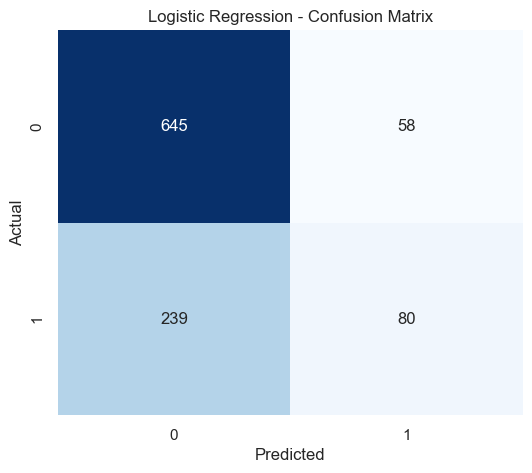

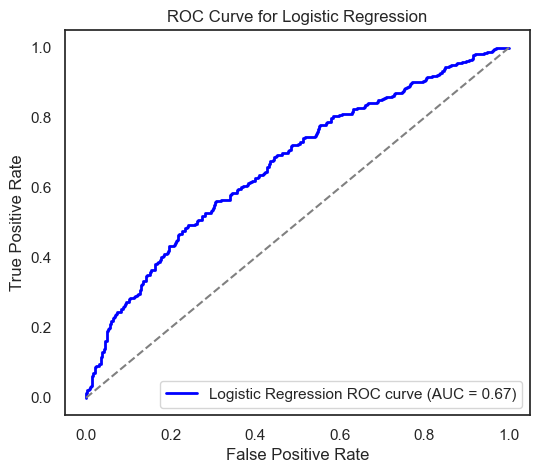


Training and evaluating Random Forest...
Accuracy of Random Forest: 0.6682974559686888

Classification Report for Random Forest
              precision    recall  f1-score   support

       False       0.73      0.82      0.77       703
        True       0.46      0.33      0.38       319

    accuracy                           0.67      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.65      0.67      0.65      1022



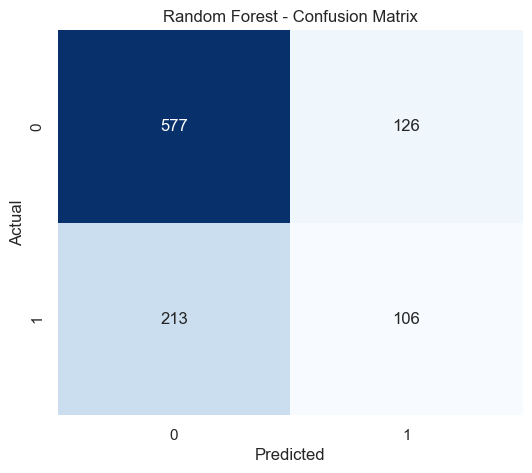

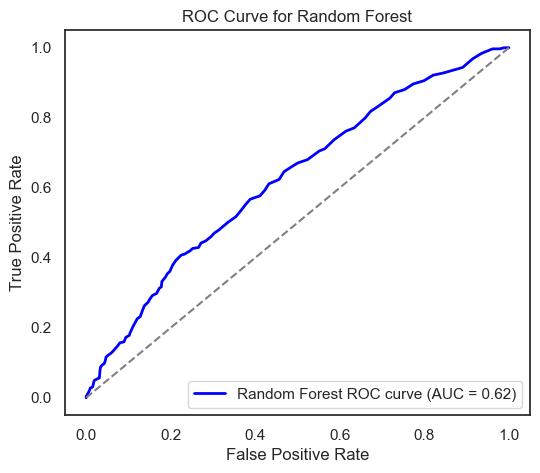


Training and evaluating Support Vector Machine...
Accuracy of Support Vector Machine: 0.687866927592955

Classification Report for Support Vector Machine
              precision    recall  f1-score   support

       False       0.69      1.00      0.82       703
        True       0.00      0.00      0.00       319

    accuracy                           0.69      1022
   macro avg       0.34      0.50      0.41      1022
weighted avg       0.47      0.69      0.56      1022



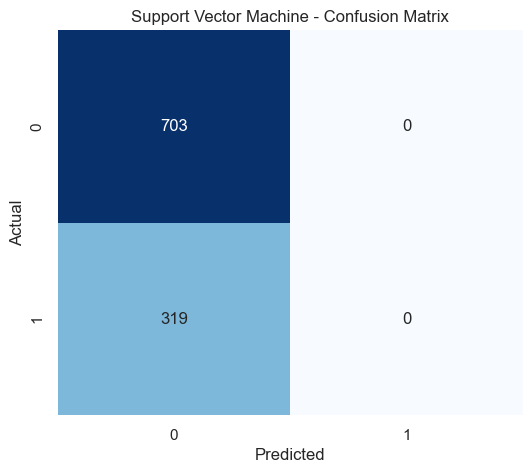

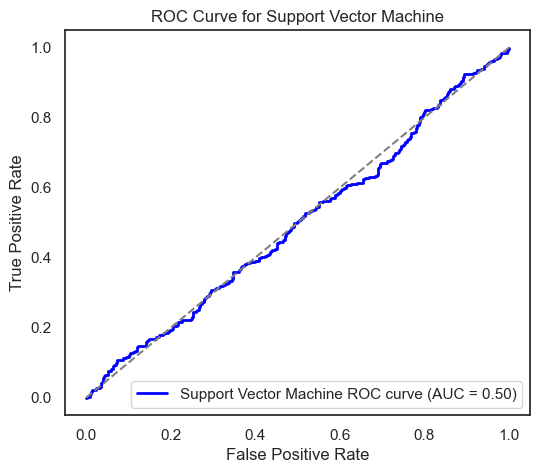


Training and evaluating K-Nearest Neighbors...
Accuracy of K-Nearest Neighbors: 0.6663405088062623

Classification Report for K-Nearest Neighbors
              precision    recall  f1-score   support

       False       0.73      0.83      0.77       703
        True       0.45      0.31      0.37       319

    accuracy                           0.67      1022
   macro avg       0.59      0.57      0.57      1022
weighted avg       0.64      0.67      0.65      1022



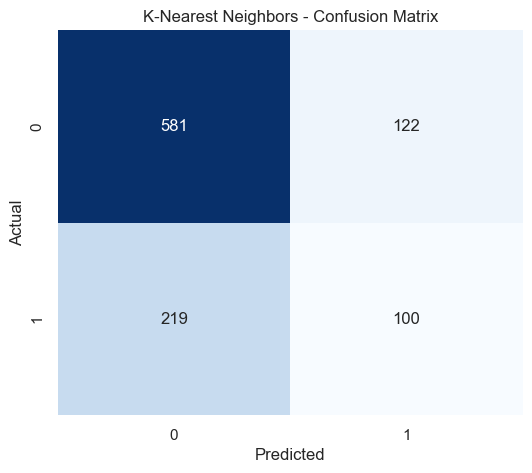

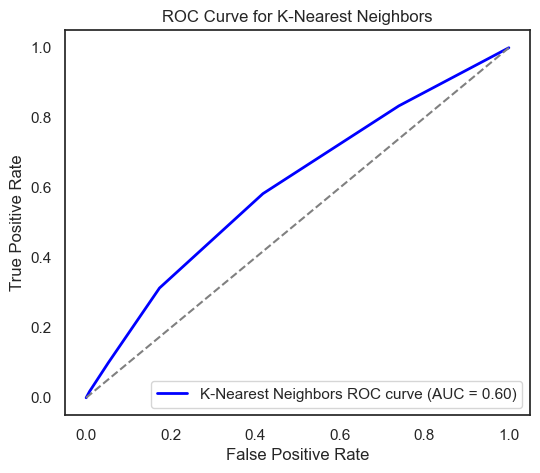


Training and evaluating Gradient Boosting...
Accuracy of Gradient Boosting: 0.7015655577299413

Classification Report for Gradient Boosting
              precision    recall  f1-score   support

       False       0.71      0.94      0.81       703
        True       0.57      0.17      0.26       319

    accuracy                           0.70      1022
   macro avg       0.64      0.56      0.54      1022
weighted avg       0.67      0.70      0.64      1022



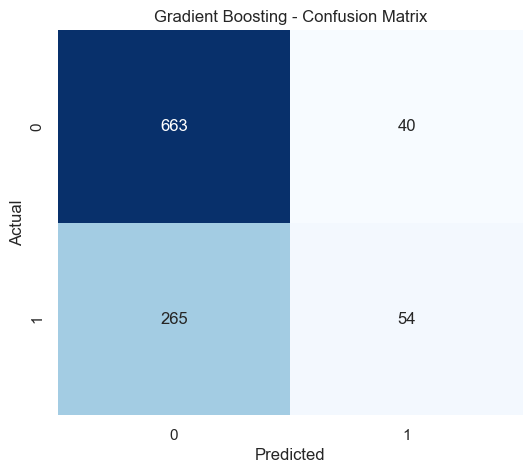

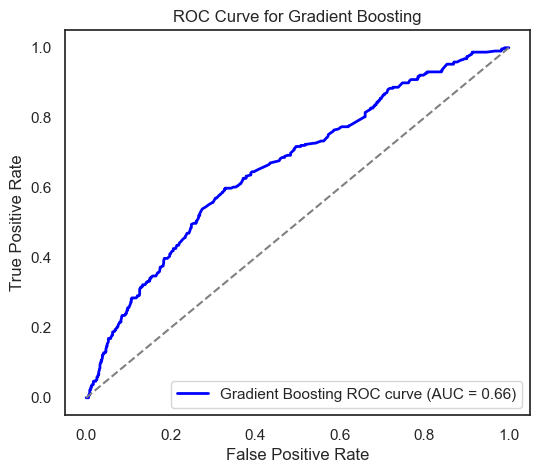


Training and evaluating Naive Bayes...
Accuracy of Naive Bayes: 0.42759295499021527

Classification Report for Naive Bayes
              precision    recall  f1-score   support

       False       0.77      0.24      0.36       703
        True       0.33      0.85      0.48       319

    accuracy                           0.43      1022
   macro avg       0.55      0.54      0.42      1022
weighted avg       0.64      0.43      0.40      1022



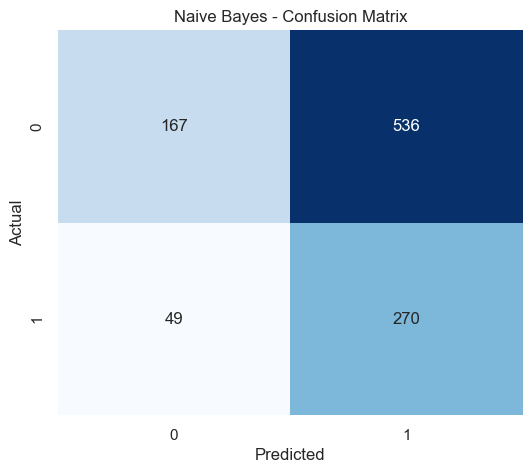

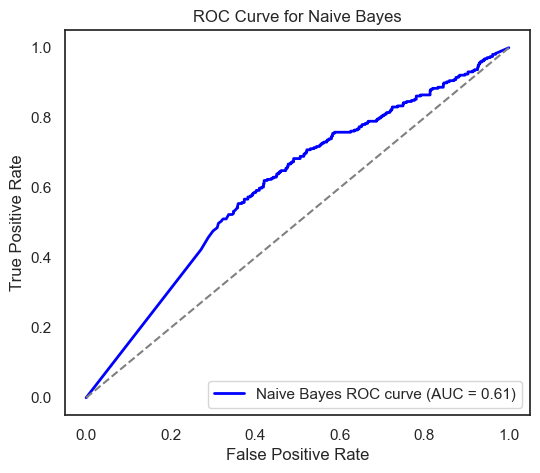


Training and evaluating Decision Tree...
Accuracy of Decision Tree: 0.6487279843444227

Classification Report for Decision Tree
              precision    recall  f1-score   support

       False       0.74      0.76      0.75       703
        True       0.43      0.41      0.42       319

    accuracy                           0.65      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.64      0.65      0.65      1022



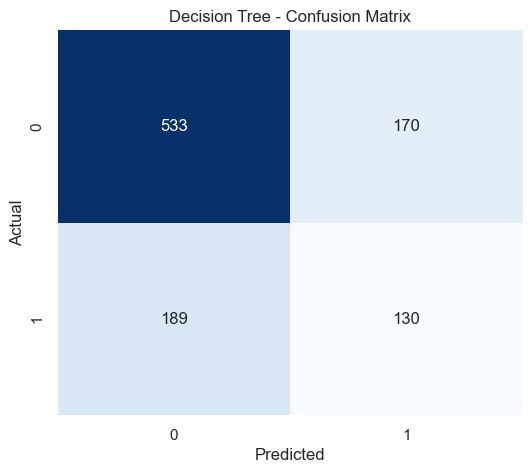

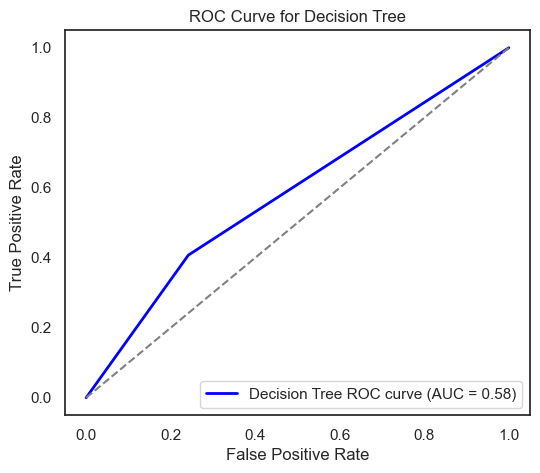

In [486]:
1# Looping through models to train and evaluate them

X_train = X_train.dropna()
y_train = y_train[X_train.index]  

# Converting all columns in X_test to numeric
X_test = X_test.apply(pd.to_numeric, errors='coerce')

X_test = X_test.fillna(X_test.mean())

# Dropping rows with NaN values
X_test = X_test.dropna()
y_test = y_test[X_test.index] 


for model_name, model in models.items():
    print(f'\nTraining and evaluating {model_name}...')
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    
    # Calculating accuracy score
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {model_name}: {acc}')
    
    # Classification report
    print("\nClassification Report for", model_name)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    


Training and evaluating Logistic Regression...
Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.73      0.92      0.81       703
        True       0.58      0.25      0.35       319

    accuracy                           0.71      1022
   macro avg       0.65      0.58      0.58      1022
weighted avg       0.68      0.71      0.67      1022


Training and evaluating Random Forest...
Accuracy: 0.67
              precision    recall  f1-score   support

       False       0.73      0.82      0.77       703
        True       0.46      0.33      0.38       319

    accuracy                           0.67      1022
   macro avg       0.59      0.58      0.58      1022
weighted avg       0.65      0.67      0.65      1022


Training and evaluating Support Vector Machine...
Accuracy: 0.69
              precision    recall  f1-score   support

       False       0.69      1.00      0.82       703
        True       0.00      0.00      0.00       3

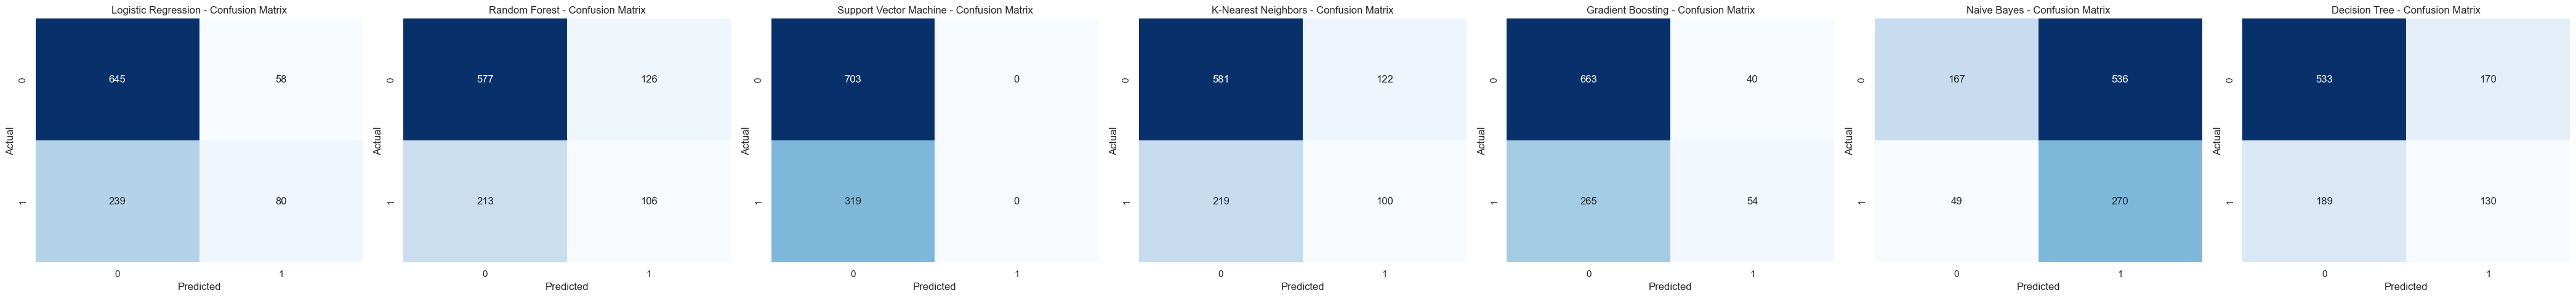

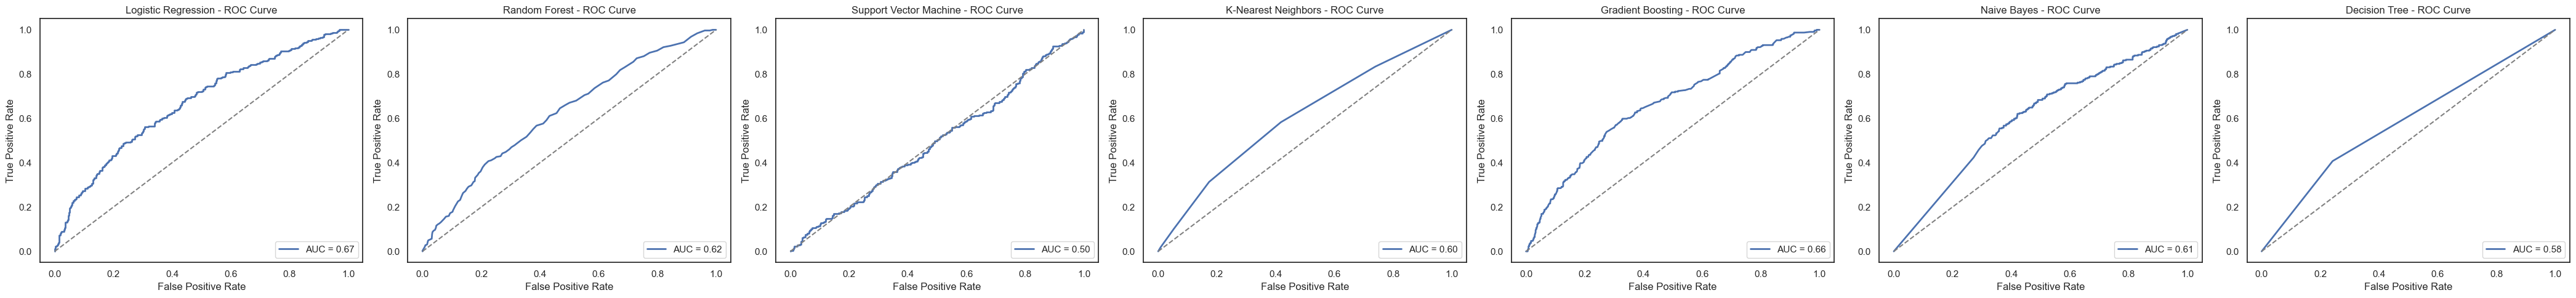

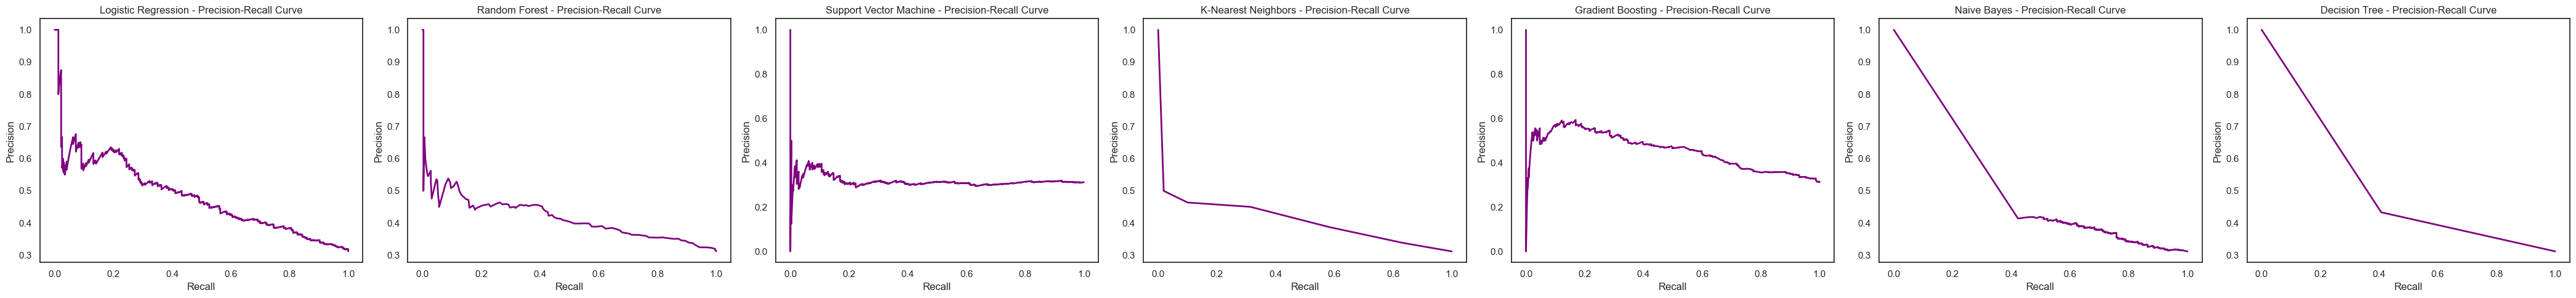

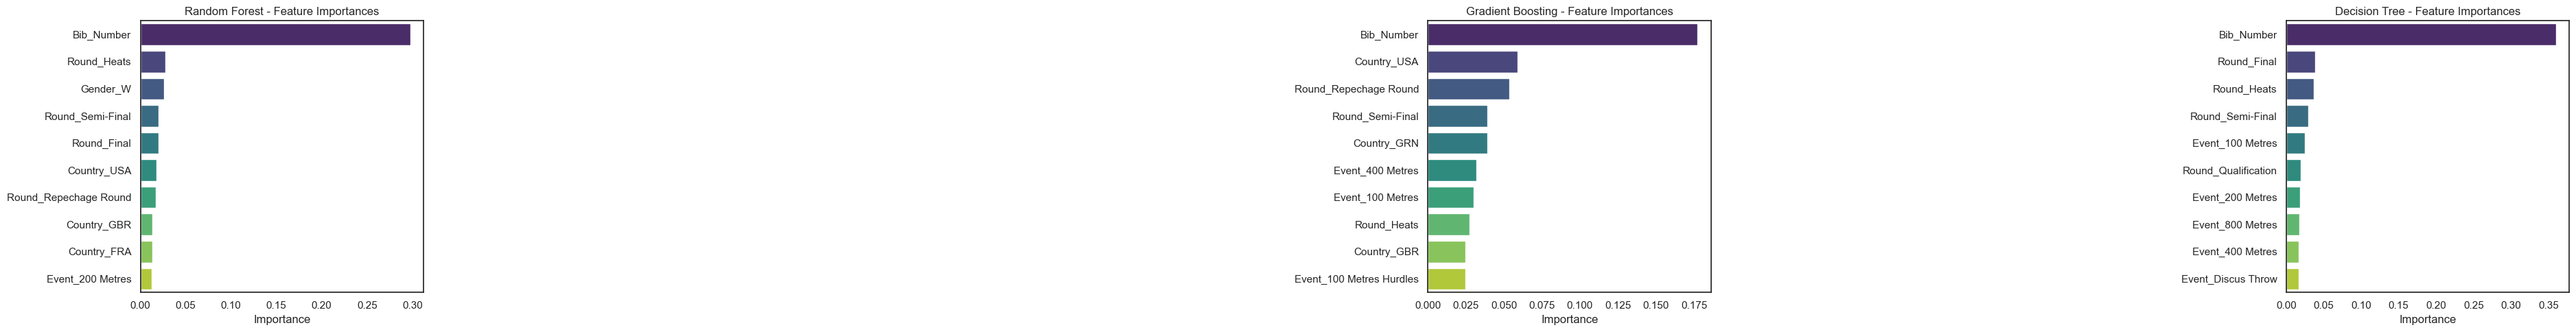

In [516]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_curve, auc,
    precision_recall_curve
)
import numpy as np

# Clean training and test sets
X_train = X_train.dropna()
y_train = y_train[X_train.index]  

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(X_test.mean())
X_test = X_test.dropna()
y_test = y_test[X_test.index] 

# Setup for layout
n_models = len(models)
figsize = (6 * n_models, 5)

# Create subplots for all visualizations
fig_cm, axes_cm = plt.subplots(1, n_models, figsize=figsize)
fig_roc, axes_roc = plt.subplots(1, n_models, figsize=figsize)
fig_pr, axes_pr = plt.subplots(1, n_models, figsize=figsize)
fig_feat, axes_feat = plt.subplots(1, n_models, figsize=figsize)

# Loop through each model
for i, (model_name, model) in enumerate(models.items()):
    print(f'\nTraining and evaluating {model_name}...')

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc:.2f}')
    print(classification_report(y_test, y_pred))

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes_cm[i])
    axes_cm[i].set_title(f'{model_name} - Confusion Matrix')
    axes_cm[i].set_xlabel('Predicted')
    axes_cm[i].set_ylabel('Actual')

    # --- ROC Curve ---
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        axes_roc[i].plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')
        axes_roc[i].plot([0, 1], [0, 1], linestyle='--', color='gray')
        axes_roc[i].set_title(f'{model_name} - ROC Curve')
        axes_roc[i].set_xlabel('False Positive Rate')
        axes_roc[i].set_ylabel('True Positive Rate')
        axes_roc[i].legend(loc='lower right')

        # --- Precision-Recall Curve ---
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        axes_pr[i].plot(recall, precision, lw=2, color='purple')
        axes_pr[i].set_title(f'{model_name} - Precision-Recall Curve')
        axes_pr[i].set_xlabel('Recall')
        axes_pr[i].set_ylabel('Precision')

    else:
        axes_roc[i].set_visible(False)
        axes_pr[i].set_visible(False)

    # --- Feature Importance ---
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = X_train.columns
        sorted_idx = np.argsort(importances)[::-1][:10]  # Top 10

        sns.barplot(
            x=importances[sorted_idx],
            y=feature_names[sorted_idx],
            ax=axes_feat[i],
            palette='viridis'
        )
        axes_feat[i].set_title(f'{model_name} - Feature Importances')
        axes_feat[i].set_xlabel('Importance')
        axes_feat[i].set_ylabel('')
    else:
        axes_feat[i].set_visible(False)

# Adjust layouts
fig_cm.tight_layout()
fig_roc.tight_layout()
fig_pr.tight_layout()
fig_feat.tight_layout()

# Show plots
plt.show()


### Conclusion 



The analysis of Track & Field athlete performance data reveals key insights into participant performance, country-level dominance, and gender distribution. After a thorough data cleaning process, we identified skewed distributions in marks, underlining the significant performance gap between top athletes and the broader field. The top 10 performers clearly outshone their peers, often representing countries with long-standing track records in specific event categories. Scatterplots and heatmaps further demonstrated how athlete position correlates with performance, while also highlighting inconsistencies in some event outcomes. Participation analysis also confirmed a reasonably balanced gender split, though male dominance was still evident in certain event types.

Overall, the cleaned dataset and visual analyses offer a clear window into global athletics performance, showcasing both excellence and opportunity areas for growth.

### Recommendations